## How to Approach Machine Learning Projects

This tutorial is a part of the [Zero to Data Science Bootcamp by Jovian](https://zerotodatascience.com).

![](https://i.imgur.com/kKdAALX.png)

In this tutorial, we'll explore a step-by-step process for approaching ML problems:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings. 

In [2]:
import os 
import jovian
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.

## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Here's the landscape of machine learning([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">


Unsupervised learning: where we dont have a target feature. For eg: we have a website and we want to know how many customers are frequent visitors. You want to learn new things from the model without having a prior data to it.



Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="640">



### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model. Evaluation metrics are often chosen based on the specific requirements of the problem domain, such as accuracy, precision, recall, F1-score, or area under the ROC curve (AUC).
    - Evaluation metrics are used to assess the performance of a trained model on unseen data or in real-world scenarios.
    - They provide insights into how well the model is performing in terms of the task's objectives.
    - Evaluation metrics are often more interpretable from a user's perspective and may not necessarily be differentiable or suitable for optimization.



* **Loss/Cost functions** - they're used by computers to optimize the ML model.
    - Loss functions are used during the training phase to optimize the model parameters.
    - They quantify the difference between predicted and true values, providing feedback to update the model's parameters to minimize this difference.
    - Loss functions are typically differentiable and used to compute gradients for parameter updates via optimization algorithms like gradient descent.


They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).



While some metrics, like Mean Squared Error (MSE) for regression or Cross Entropy for classification, serve both as loss functions during training and evaluation metrics during testing, it's essential to distinguish between their roles based on the phase of the machine learning workflow in which they are used. Additionally, not all metrics used during testing are derived from loss functions used during training. For instance, metrics like accuracy, precision, recall, and F1-score are commonly used evaluation metrics in classification tasks but are not typically used as loss functions during training.





See this article for a survey of common loss functions and evaluation metrics: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

Mean Absolute error (MAE) is an evaluation metric which one can use if one is not worried about outliers (noise in the pattern). But if outliers needs to be considered properly, use RMSE.

## Step 3 - Download, clean & explore the data and create new features

<img src="https://i.imgur.com/0f7foe7.png" width="640">

### Downloading Rossmann Store Sales data

There may be different sources to get the data:

* CSV files
* SQL databases
* Raw File URLs
* Kaggle datasets 
* Google Drive
* Dropbox
* etc.

Identify the right tool/library to get the data. 

For the Rossmann Store Sales prediction dataset, we'll use the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/rossmann-store-sales/rules) before executing the following cell.

In [4]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pragyasingh03041996
Your Kaggle Key: ········


100%|██████████████████████████████████████| 6.99M/6.99M [00:01<00:00, 4.50MB/s]



Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [5]:
os.listdir('rossmann-store-sales')

['test.csv', 'train.csv', 'store.csv', 'sample_submission.csv']

In [6]:
ross_df=pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)

In [7]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
store_df=pd.read_csv('./rossmann-store-sales/store.csv')

In [10]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


We can merge the two data frames to get a richer set of features for each row of the training set. 

In [11]:
merged_df=ross_df.merge(store_df, how='left', on='Store')

In [12]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')


In [14]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [15]:
merged_test_df=test_df.merge(store_df, how='left', on='Store')

In [16]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Cleaning Data

The first step is to check the column data types and identify if there are any null values.

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [18]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [25]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In the above description, we see that on certain days, the sale was 0 which are normally the days when stores are not open. So one should think, that how we want to continue with those datasets. Our goal is to predict sale, and if the store is closed, we know the sale. 

So one can think, should we consider those rows separately or use our expensive models to train a known outcome. 

One should also consider if there are duplicate rows, and it they are there for some reasons. In this data sets, it is highly unlikely, because we have store number and even if two stores did exactly same sale some day, their store ID cant match

In [26]:
merged_df.duplicated().sum()

0

Parse the date column

In [27]:
merged_df['Date'] =pd.to_datetime(merged_df.Date)

In [28]:
merged_test_df['Date'] =pd.to_datetime(merged_test_df.Date)

In [29]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [30]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering

**Feature engineering** for eg. you have to predict the value of certain houses, and data contains lenth and breath as features. We know that area has a linear relationship to price so we can combine length and breadth columns to create a new feature called "Area"

<AxesSubplot:xlabel='Sales', ylabel='Count'>

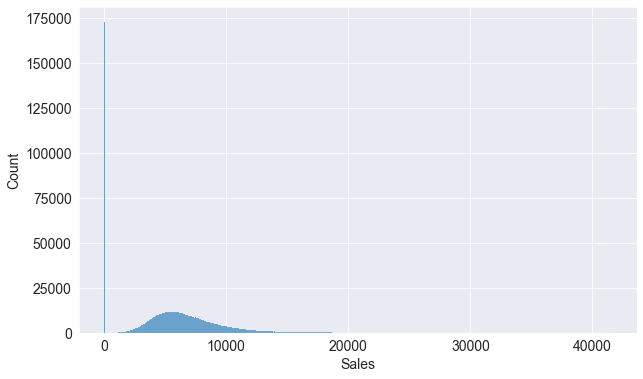

In [31]:
sns.histplot(data=merged_df, x='Sales')

Out of 1017209 entries, stores seems to have no sales on 175000 days, which is like 1/6th of the number of days, suggesting a day when the store is closed. Now a linear model, will have a hard time figuring out such behaviour

In [32]:
merged_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

To make our modeling simple, let's simply exclude the dates when the store was closed (we can handle it as a special case while making predictions. 

In [33]:
merged_df = merged_df[merged_df.Open==1].copy()

<AxesSubplot:xlabel='Sales', ylabel='Count'>

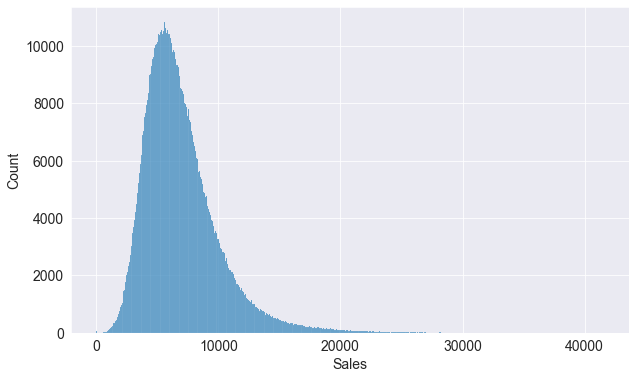

In [34]:
sns.histplot(merged_df, x='Sales')

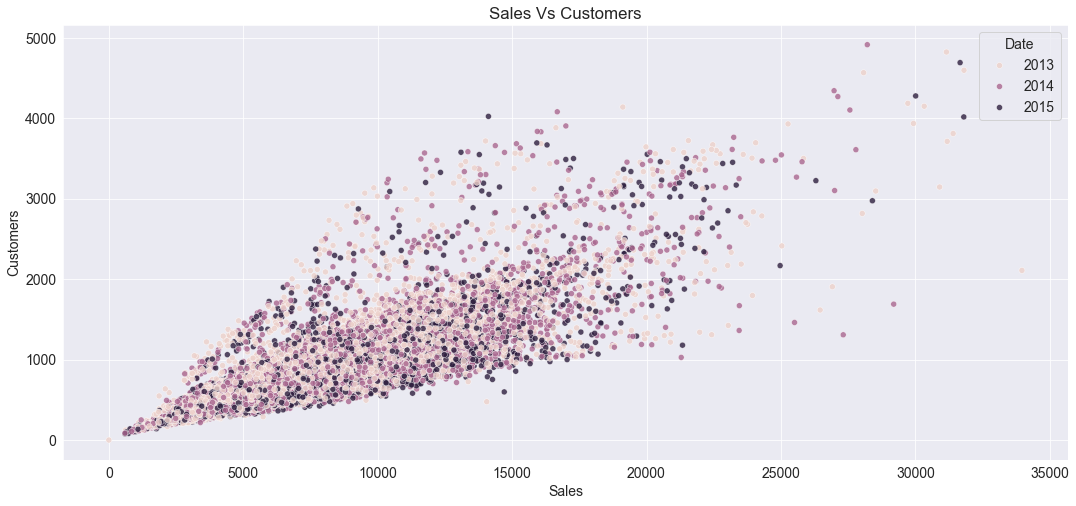

In [35]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()


We see a linear relationship b/w sales and customers, but we cannot use the customers column to predict the sale, as we will not be aware of how many customers will come to store on a particular day. This could be other ML problem though

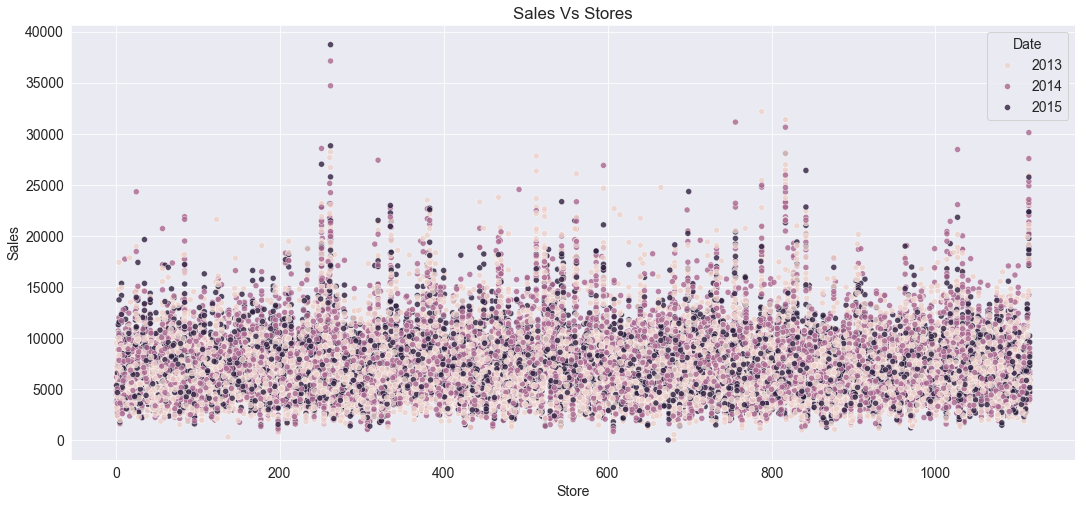

In [40]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(40000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Stores")
plt.show()

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_51743/4278984927.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(merged_df, x='DayOfWeek', y='Sales', palette='husl')


<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

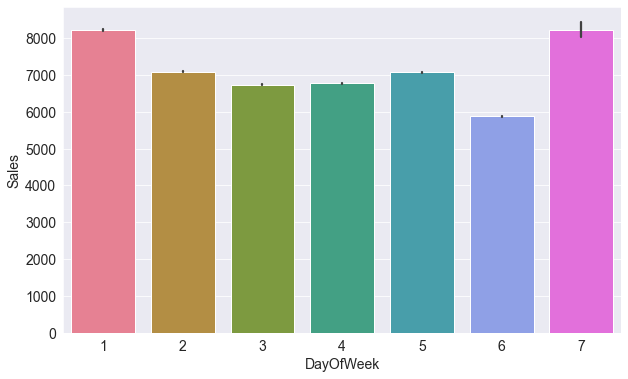

In [46]:
sns.barplot(merged_df, x='DayOfWeek', y='Sales', palette='husl')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

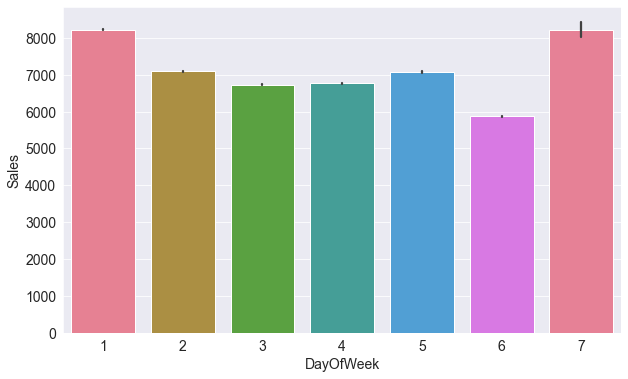

In [51]:
sns.barplot(merged_df, x='DayOfWeek', y='Sales', hue='DayOfWeek',  palette='husl' ,legend=False)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

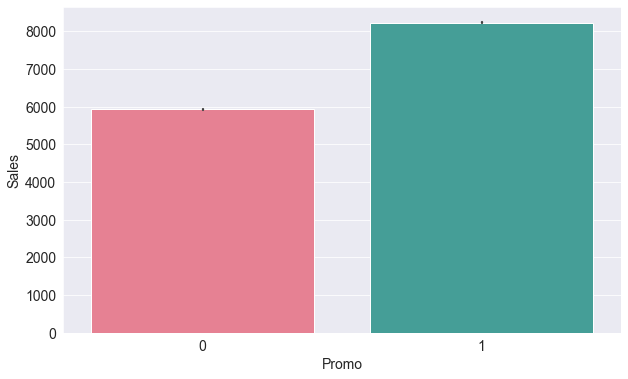

In [52]:
sns.barplot(merged_df, x='Promo', y='Sales', hue='Promo',  palette='husl' ,legend=False)

In [53]:
merged_df.corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

### Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources. 


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End


In [54]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

<AxesSubplot:xlabel='Day', ylabel='Sales'>

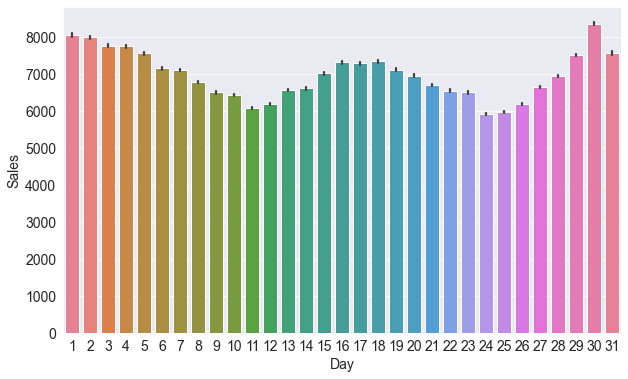

In [55]:
sns.barplot(merged_df, x='Day', y='Sales', hue='Day',  palette='husl' ,legend=False)

<AxesSubplot:xlabel='Month', ylabel='Sales'>

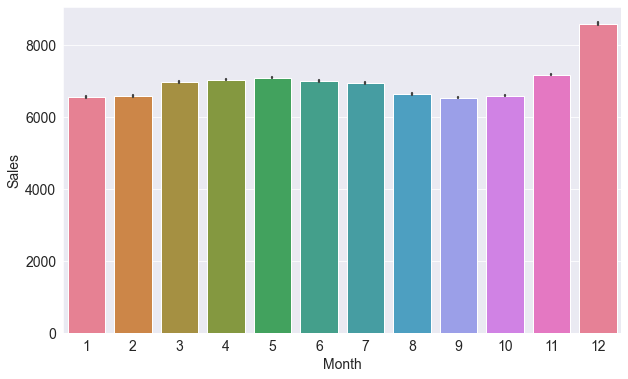

In [56]:
sns.barplot(merged_df, x='Month', y='Sales', hue='Month',  palette='husl' ,legend=False)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

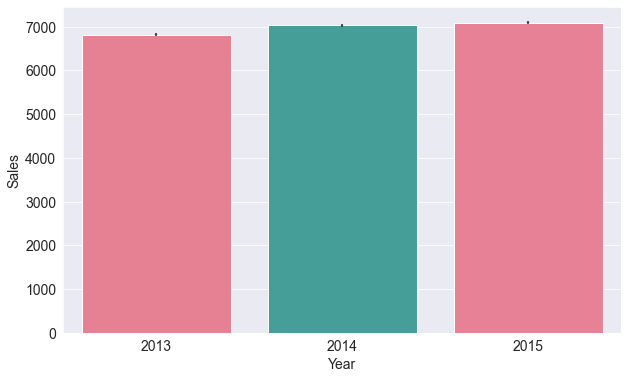

In [57]:
sns.barplot(merged_df, x='Year', y='Sales', hue='Year',  palette='husl' ,legend=False)

Using date information, we can also create new current columns like: 

1. Weather on each day
2. Whether the date was a public holiday
3. Whether the store was running a promotion on that day.


In [58]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson4


'https://jovian.com/pragyakiran03041996/lesson4'

## Step 4 - Create a training/test/validation split and prepare the data for training

<img src="https://i.imgur.com/XZ9aP10.png" width="640">

In [59]:
len(merged_df)

844392

In [60]:
train_size=int(.75 * len(merged_df))
train_size

633294

In [61]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [64]:
len(train_df), len(val_df)

(633294, 211098)

In [65]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [66]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [67]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [68]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

### Input and Target columns

Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [69]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [70]:
target_col = 'Sales'

In [71]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

Here, we have 1115 unique values for Store (basically a store ID), which technically is a categorical column. So we would like to treat it like a category, but the problem is, it will lead to 1115 new columns, which will blow up the size of the dataset. 


It will also make the model a bit hard to train because of **Curse of dimnesionality** which means if you have alot of features which are very closely correlated, then that makes it a lot easier for the models to overfit. 

In [72]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [73]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [75]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

In [76]:
test_inputs = merged_test_df[input_cols].copy()
# Test data does not have targets

In [78]:
# starting as a very simple case
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range. 

In [79]:
from sklearn.impute import SimpleImputer

In [80]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [81]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Note that this step wasn't necessary for the store sales dataset, as there were no null values. Also, we can apply a different imputation strategy to different columns depending on their distributions (e.g. mean for normally distribute and median for exponentially distributed).

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [84]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson4" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson4


'https://jovian.com/pragyakiran03041996/lesson4'

## Step 5 - Create quick & easy baseline models to benchmark future models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

In [86]:
def return_mean(inputs):
    return np.full(len(inputs),merged_df.Sales.mean())

In [87]:
train_preds = return_mean(X_train)

In [88]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Let's evaluate this to using the RMSE score. (COMPETITION ASKS FOR RMSPE where P is for percentage)

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
mean_squared_error(train_preds, train_targets, squared=False)

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3082.450443277419

In [92]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3168.6033635047716

The model is off by about $3000 on average.

Let's try another model, which makes a random guess between the lowest and highest sale.

In [107]:
def guess_random(inputs):
#     lo, hi = merged_df.Sales.min(),  merged_df.Sales.max() 
    lo, hi = 3000, 18000
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [108]:
train_preds = guess_random(X_train)
train_preds

array([16931.93925354, 12264.8406022 , 12056.00938521, ...,
       14950.91051349,  3164.48291405,  7720.12405918])

In [109]:
mean_squared_error(train_preds, train_targets, squared=False)

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6435.26297495984

In [110]:
mean_squared_error(guess_random(X_val), val_targets, squared=False)

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6300.239261580876

### Hand-coded Strategies

> **EXERCISE**: Write a function that implements the following strategy:
>
> 1. If the store is closed, return 0.
> 2. If the store is open, return the average sales of the store for the current month in the previous year.
>
> Find the validation set score for this strategy.

### Baseline ML model

Let's train a simple `LinearRegression` model, with no customization.

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
linreg = LinearRegression()

In [114]:
linreg.fit(X_train, train_targets)

LinearRegression()

In [115]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7127.   , 10595.   ,  7048.375, ...,  6246.75 ,  6001.75 ,
        5621.5  ])

In [116]:
mean_squared_error(train_preds, train_targets, squared=False)

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2741.5913488466613

In [117]:
val_preds = linreg.predict(X_val)
val_preds


array([5621.625, 5621.75 , 6002.375, ..., 8641.5  , 8395.875, 7832.875])

In [118]:
mean_squared_error(val_preds, val_targets, squared=False)

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2817.674671016078

In [119]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson4" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson4


'https://jovian.com/pragyakiran03041996/lesson4'

## Step 6 - Pick a strategy, train a model & tune hyperparameters

<img src="https://i.imgur.com/aRuE5mw.png" width="640">

### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/stable/_static/ml_map.png)


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- [Use a spreadsheet](https://docs.google.com/spreadsheets/d/1S42lnklqdj4hS3BohffyvZVJOFBZJ61VDiHLMuf2zBw/edit?usp=sharing) to keep track of your experiments and results.

In [120]:
def try_model(model):
    model.fit(X_train, train_targets)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    
    return train_rmse, val_rmse

### Linear Models

Read about linear models here: https://scikit-learn.org/stable/modules/linear_model.html

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [123]:
try_model(LinearRegression())

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.5913488466613, 2817.674671016078)

In [124]:
try_model(Ridge())

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.5871950814444, 2817.7784665409863)

In [125]:
try_model(Lasso())

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2741.714390464056, 2817.9472924045217)

In [126]:
try_model(ElasticNet())

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2879.0432103903954, 2972.665886050338)

In [127]:
try_model(SGDRegressor())

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2742.4913036656762, 2816.8797236694745)

**All the linear models gave pretty bad results**

### Tree Based Models

* Decision trees: https://scikit-learn.org/stable/modules/tree.html
* Random forests and gradient boosting: https://scikit-learn.org/stable/modules/ensemble.html

In [129]:
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [130]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.0, 1559.7378600480247)

Seems like the decision tree performs much better than linear models. But as usual, train_rmse is zero which means model is overfitting. 

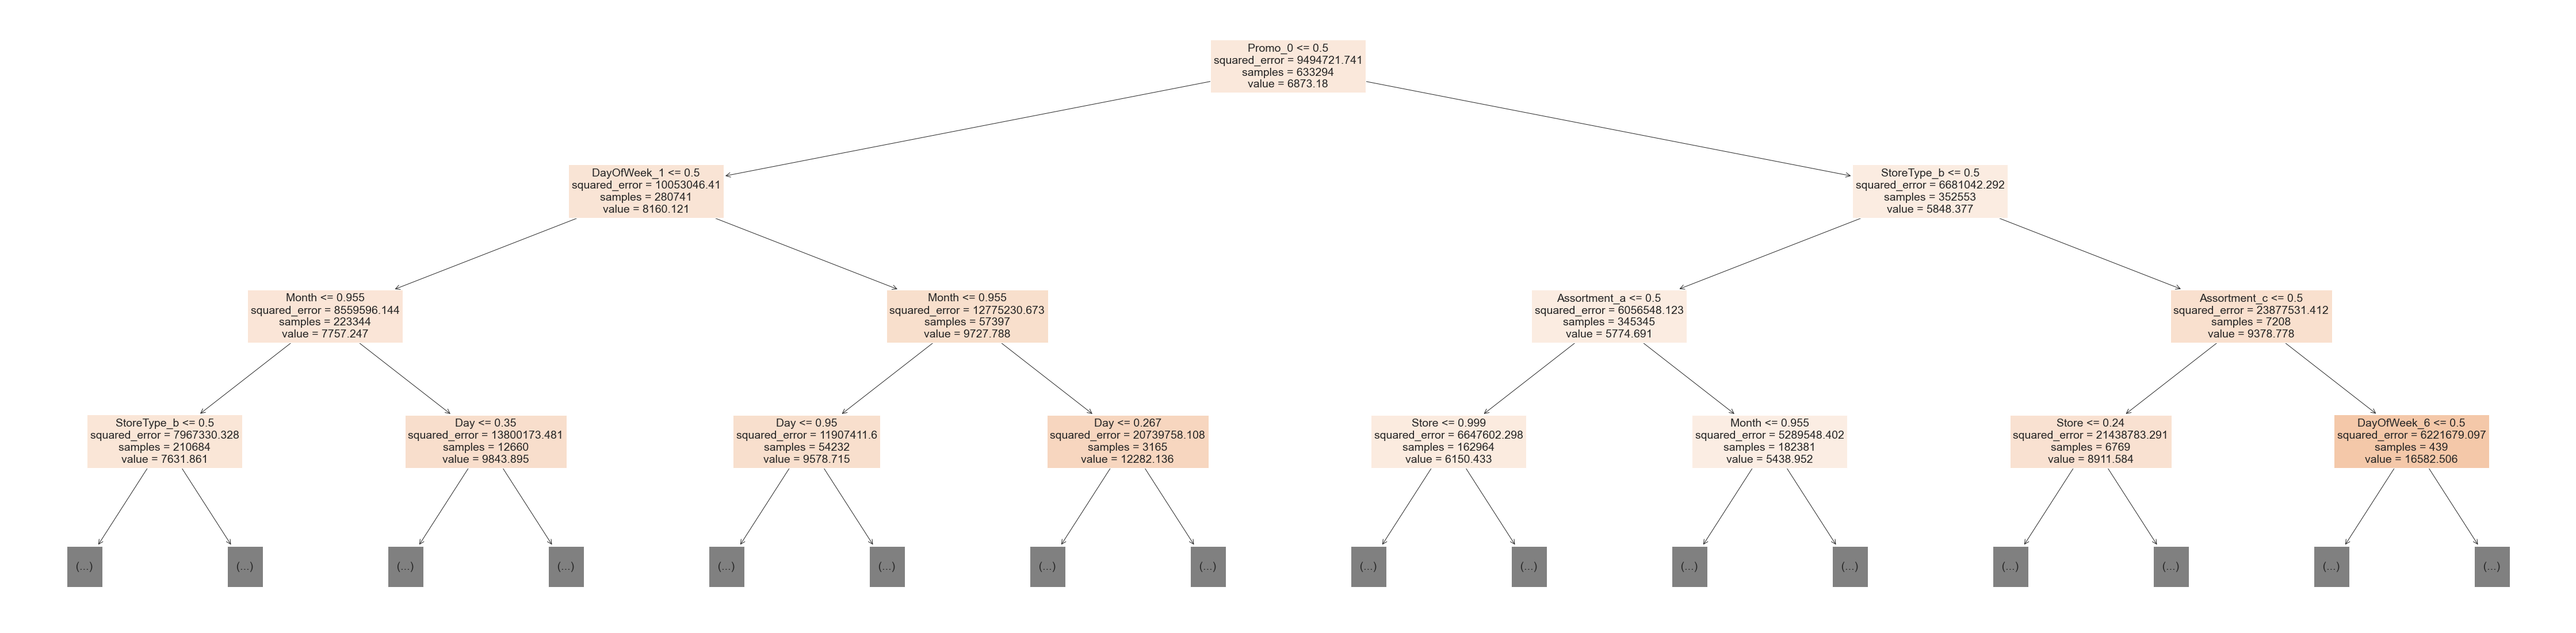

In [132]:
plt.figure(figsize=(80,20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

In [133]:
from sklearn.ensemble import RandomForestRegressor


In [134]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: user 4min 1s, sys: 7.14 s, total: 4min 9s
Wall time: 41.5 s


/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/pragya/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(474.9198974666898, 1371.7321923469985)

We've seen a significant reduction in the loss by using a random forest at the cost of interpretibility. Single decision tree over more interpretation as we know what led to more sales (for eg. promo has a high gini_index). On the other hand, ensemble of decision tree offers some sort of feature importance, combines multiple decision trees to improve prediction accuracy and reduce overfitting by averaging their outputs or considering a majority vote, thus enhancing robustness and generalization capability

In [135]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson4" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson4


'https://jovian.com/pragyakiran03041996/lesson4'

In [145]:
rf.n_estimators #number of decision trees 

100

## Step 7 - Experiment and combine results from multiple strategies

<img src="https://i.imgur.com/ZqM6R8w.png" width="640">

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### K-Fold Cross Validation


Here's what K-fold cross validation looks like visually ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

<img src="https://i.imgur.com/MxnzWwT.png" width="480">

Follow this tutorial to apply K-fold cross validation: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/


Divide the train data into k-folds and then use k-1 fold as training dataset and "one" as the test data-set. Do it k times and then average over the parameters to make a better model


### Ensembling and Stacking

Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually([source](https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html)):

<img src="https://i.imgur.com/rrOKVEd.png" width="480">


Now, it might be the case that one of the chosen model is better than the others, but other still capture some diverse predictions of the data. So, we can give weight to different prediction. The one with better prediction can be given a higher weight

Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually ([source](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)): 

<img src="https://i.imgur.com/VVzCWNB.png" width="400">

Here's a tutorial on stacking: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/


Now, we mentioned that one can give weights to different model in the previous markdown, so the question is how do you associate the weight using computer? The answer is by minimizing the loss function. In simple words, one can think of another linear model on top of these diverse prediction model, where the inputs would be the model, and one can iterate over weight to get the best set of parameter  

In [146]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson4" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson4


'https://jovian.com/pragyakiran03041996/lesson4'

## Step 8 - Interpret models, study individual predictions & present your findings

<img src="https://i.imgur.com/9axhOrA.png" width="640">

### Feature Importance

You'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

In [147]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [149]:
X_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [150]:
importance_df = pd.DataFrame({
    'feature': numeric_cols + encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

In [151]:
importance_df

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


<AxesSubplot:xlabel='importance', ylabel='feature'>

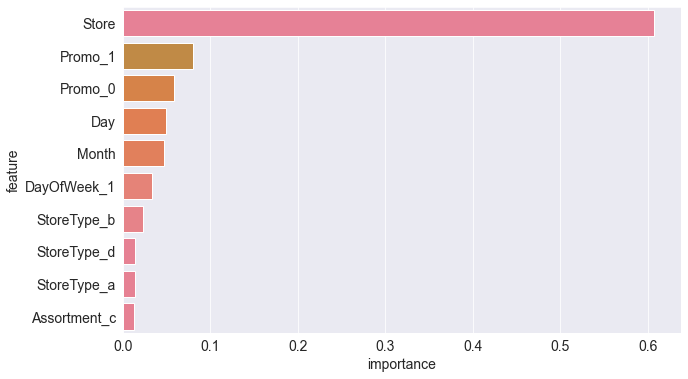

In [156]:
sns.barplot(importance_df.head(10), y='feature', x='importance', hue='importance',  palette='husl' ,legend=False)

### Looking at individual predictions

In [163]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0 #zero sales if store is not open
    
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0] #0 because we only want prediction for single input
    return pred


In [159]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}


In [164]:
predict_input(rf, sample_input)


4258.01

### Making a submission on Kaggle

If you're participating in a Kaggle competition, you can generate a submission CSV file and make a submission to check your score on the test set.

In [165]:
test_preds = rf.predict(X_test)
test_preds

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

In [166]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [167]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [170]:
test_preds

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

In [171]:
submission_df['Sales'] = test_preds

In [178]:
test_df['Open'].unique()

array([ 1., nan,  0.])

In [179]:
test_df['Open'].fillna(1).astype('int') * test_preds

0         4258.01
1         7713.83
2         8775.70
3         6775.37
4         6492.47
           ...   
41083     3052.40
41084     9008.27
41085     5954.68
41086    20823.07
41087     6748.48
Name: Open, Length: 41088, dtype: float64

In [180]:
submission_df['Sales'] = test_preds

In [185]:
submission_df.to_csv('submission.csv', index=None)

In [183]:
from IPython.display import FileLink

In [187]:
FileLink('submission.csv')

/Users/pragya/Desktop/LEARN/ML_freecode/submission.csv

In [188]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson4" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson4


'https://jovian.com/pragyakiran03041996/lesson4'

## Revision Questions
1.	What are the steps involved in approaching a machine learning problem?
2.	What does problem identification mean?
3.	What is a loss function? Explain different loss functions.
4.	What is an evaluation metric? Explain different evaluation metrics.
5.	What is feature engineering?
6.	How does feature engineering help in building a better model?
7.	What is a baseline model?
8.	What is a hard-coded strategy?

    Answer: A hard-coded strategy in machine learning refers to a fixed set of rules or algorithms explicitly 
    programmed into a system to solve a specific problem, without the ability to adapt or learn from data 
    dynamically. 
    For eg. Alexa: which responds to certain keyword like music and others, but it doesnt learn with the human 
    interaction
    
    
9.	What are linear models?
10.	What are tree based models?
    
    Answer: Tree-based models are a class of machine learning algorithms that use a tree-like structure to make 
    predictions. These models recursively partition the input space into smaller regions and assign a prediction to 
    each region. Examples of tree-based models include decision trees, random forests, gradient boosting machines 
    (GBM), and XGBoost. They are popular due to their interpretability, flexibility, and ability to handle complex 
    relationships in the data.


11.	What are some unsupervised machine learning problems?
12.	What are some strategies used to improve the performance of a model?
13.	What is grid-search?
    
    
    Answer: Grid search is a hyperparameter tuning technique in machine learning that involves systematically  
    searching for the optimal combination of hyperparameters by evaluating all possible parameter combinations 
    within a predefined grid. It exhaustively tries every combination of hyperparameters to find the one that 
    yields the best performance according to a chosen evaluation metric.
    
14.	What is K-fold cross validation?
15.	What is ensembling? What are some ensemble methods?

    Answer: Ensembling is a machine learning technique that combines the predictions of multiple models to improve 
    overall performance. Ensemble methods leverage the diversity of different models to make more accurate 
    predictions than any individual model alone. Some ensemble methods include bagging (e.g., Random Forest), 
    boosting (e.g., Gradient Boosting Machines), and stacking.
    
    K-fold cross validation is not an example of ensembling because you are not combining several models
    

Ensembling helps in making better predictions by combining the strengths of multiple individual models while mitigating their weaknesses. By aggregating the predictions of diverse models, ensembling can improve overall performance, reduce overfitting, and enhance generalization to new data.


Stacking, also known as stacked generalization, is a technique that combines the predictions of multiple base models using a meta-model. Instead of using simple averaging or voting like traditional ensembles, stacking learns to weigh the predictions of base models based on their performance on a validation set.


Stacking helps in making better predictions by allowing the meta-model to learn optimal combinations of base model predictions, potentially capturing complex relationships and improving overall prediction accuracy. It leverages the strengths of diverse base models while reducing the risk of overfitting and bias.


Model deployment refers to the process of making a trained machine learning model available for use in a production environment, where it can generate predictions or perform tasks based on real-time or batch data.


Some model deployment frameworks include TensorFlow Serving, Flask, Django, Amazon SageMaker, and Microsoft Azure Machine Learning. These frameworks provide infrastructure, APIs, and tools to deploy and manage machine learning models at scale, ensuring reliability, scalability, and efficiency in production environments.

In [189]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragyakiran03041996/lesson4" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/pragyakiran03041996/lesson4


'https://jovian.com/pragyakiran03041996/lesson4'